## Arbitrage

### Definition
<b>Simple practical case</b><br/>
Making profit by buying and selling the same thing.

<b>Generalized theoretical definition</b><br/>
Making profit by changing your portfolio one full circle along a closed directed path of portfolio change steps.

#### Question: Expected profit by subsequent exchanges
Without fees and expenses, what is the expected relative amount one can make by exchanging three currencies in a row ?

Let's denote the BTC vs USD exchange rate by $\,\mathrm{BTC}\,/\,\mathrm{USD}\,$.

With the minute-resolution exchange rate data that you downloaded plot the time series 
$\,\log A\,(\,t\,)=\displaystyle{\frac{\mathrm{ETH}\,/\,\mathrm{BTC} \cdot \mathrm{BTC}\,/\,\mathrm{USD}}{\mathrm{ETH}\,/\,\mathrm{USD}}}\,$.

1. In a perfect world what would you expect this number to be ?

2. Let's calculate and plot $\,\log A\,(\,t\,)\,$.

###### Download cryptocurrency exchange rates
1. Please go to https://www.kaggle.com/tencars/392-crypto-currency-pairs-at-minute-resolution.
2. Download into the current directory (the same directory as this .ipynb notebook file) the data files for ethbtc, btcusd and ethusd.<br/>Save these zipped files with the following names: ethbtc.csv.zip, btcusd.csv.zip and ethusd.csv.zip. 

###### Read data and Calculate A ( t )

In [1]:
import pandas as pd
import numpy as np

# --- data: reading and transformations ---
# FX (exchange rates): read three dataframes
fx = {pair: pd.read_csv(pair + '.csv.zip') for pair in ('ethbtc', 'btcusd', 'ethusd')}

# tag each data column name with the name of the currency pair
def column_name_mapping(columns, tag):
    return {col: col if col == 'time' else tag + '_' + col for col in columns}

[df.rename(columns = column_name_mapping(df.columns, pair), inplace=True) for pair, df in fx.items()]

# fxm (fx merged): merge dataframes based on the 'time' column
fxm = fx['ethbtc'].merge(fx['btcusd'], on='time').merge(fx['ethusd'], on='time')

# arbitrage opportunity testing
log_A = np.log( fxm['ethbtc_close'] * fxm['btcusd_close'] / fxm['ethusd_close'] )

###### Plot A ( t )

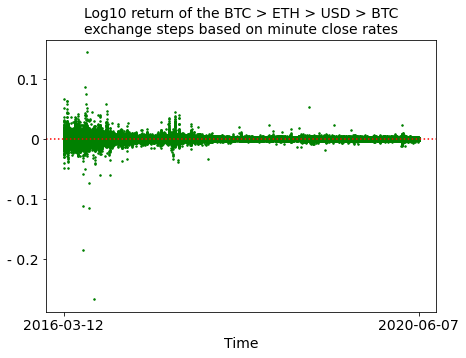

In [2]:
import matplotlib.pyplot as plt

fontsize = 14
yticks = [-0.2, -0.1 ,0, 0.1]

plt.plot(log_A, 'g.', markersize=3)
plt.title("Log10 return of the BTC > ETH > USD > BTC\nexchange steps based on minute close rates", fontsize=fontsize)
plt.xlabel('Time', fontsize=fontsize)
ax = plt.gca()
ax.set_xticks([0, len(fxm['time'])])
ax.set_xticklabels(['2016-03-12','2020-06-07'], fontsize=fontsize)
ax.set_yticks(yticks)
ax.set_yticklabels([str(_).replace('-', '- ') for _ in yticks], fontsize=fontsize)
plt.axhline(0, c='r', ls='dotted')

fig = plt.gcf()
fig.set_size_inches([7, 5])
plt.show()

## Efficient market hypothesis (EMH)
<b>Theoretical definition</b><br/>
All information is instantaneously available to everyone, and from this information everyone makes the same conclusions.<br/>
Therefore, in the long time limit there is no active trading strategy that has positive expected profit above the risk-free rate.

<b>Practical definition</b><br/>
Arbitrage opportunities are removed quickly, because the market has many well-informed participants who act quite rationally.

<b>Comment</b><br/>
The EMH is a simplified approximation of real markets.<br/>
It can provide guidance, but its results can differ significantly from actual observed market behaviors. 

## Modern Portfolio Theory (MPT, 1952)

The MPT is also called Markowitz Portfolio Theory after [the 1952 paper](https://www.jstor.org/stable/2975974) of Harry Markowitz.<br/>
The MPT is also called `mean-variance` analysis.


A `portfolio` is a collection of financial assets, for example, 10 shares of stock A and 90 shares of stock B.
<br/>
In this example stock A and stock B are called the `constituent assets` of the portfolio.

For theoretical work the sum of the weights is normalized to 1. In the example, we have 0.1 stock A and 0.9 stock B.

### Outline

The MPT connects the risk of a portfolio with its expected return based on the following assumptions:

1. Market participants optimize the weights of portfolio constituents for minimal risk and maximal expected return of the portfolio.
2. For all constituents the expected returns and the covariances
  * are known and
  * they are constants, in other words, they do not change in time.
3. Portfolio risk is quantified as the yearly variance of the portfolio.

###### Comments

* The MPT is a two-moment decision model. It uses the first two moments: the means and the covariance matrix.

* The variance of the $\,k$th asset is the $\,k$th number in the main diagonal of the covariance matrix.

* The `volatility` is the square root of the `variance`. The volatility is also called `standard deviation`.


* If you compare return to volatility instead of variance, then the Capital Market Line (CML) will not be a line.

* With the MPT it is also assumed that from the expected return we can calcuate the fair price with discounting.

### Efficient Frontier with assets that have non-zero risk

#### Tools for the mean-variance analysis

###### Linear algebra refresher -- Notations for scalars, vectors and matrices

* A `tensor` is a variable with indexes:
  * a vector has one `index`, for example, the vector $\,\mathbf{w}\,$ has the index $\,i\,$ with the possible values $\,1,\,2,\,\dots,\,N\,$,
  * a matrix has two indexes, for example, the correlation matrix $\,\boldsymbol{\rho}\,$ has the indexes $\,j\,$ and $\,k\,$, both with possible values $\,1,\,2,\,\dots,\,N\,$.

* A `scalar` is a variable with _no_ indexes, for example, 
$\,f\left(\,x_{\,1},\,x_{\,2}\,\right) = x_{\,1} + x_{\,2}\,$ 
is a scalar function of the vector $\,\left(\,x_{\,1},\,x_{\,2}\,\right)\,$.


* If the $\,k$th index of tensor $\,\mathbf{a}\,$ has the possible values $\,1,\,2,\,\dots,\,N\,$, then the $\,k$th `dimension` of that tensor is $\,N\,$.

* If $\,\mathbf{a}\,$ is a vector or a matrix, then $\,\mathbf{a}^\mathrm{\,T}\,$ is the `transposition` of $\,\mathbf{a}\,$. 
  * If $\,\mathbf{a}\,$ is a row vector, then $\,\mathbf{a}^\mathrm{\,T}\,$ is a column vector.


* If $\,\mathbf{a}\,$ and $\,\mathbf{b}\,$ are both row vectors, then $\,\mathbf{a} \cdot \mathbf{b}^\mathrm{\,T}\,$ is their `dot product`, which is a number.
  * The dot product can be also written without the $\,\cdot\,$ sign, for example, $\,\mathbf{a} \, \mathbf{b}^\mathrm{\,T}\,$.
* If $\,\mathbf{a}\,$ and $\,\mathbf{b}\,$ are both row vectors, then $\,\mathbf{a}^\mathrm{\,T} \circ\, \mathbf{b}\,$ is their `dyadic product`, which is a matrix.


* Let $\,\mathbf{1}\,$ denote the $\,N$-dimensional row vector with all $\,1\,$ values: $\,\mathbf{1}=\left(\,1,\,1,\,\dots,\,1\,\right)\,$ . 

###### Finance terms

* Consider a `portfolio` with $\,N\,$ assets.

* The `weights` of the assets are $\,\mathbf{w}=\left(\,w_{\,1},\,w_{\,2},\,\dots,\,w_{\,N}\,\right)\,$, and
the sum of asset weights is $\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}=1\,$.

* The yearly expected `returns` of the asset prices are $\,\mathbf{r}=\left(\,r_{\,1},\,r_{\,2},\,\dots,\,r_{\,N}\,\right)\,$.



* The covariance is usually calculated between the daily log returns of the asset prices, not the asset prices.

* The covariance of the $\,j$th and $\,k$th assets is $\,c_{\,j\,k}=c_{\,k\,j}\,$, and the entire `covariance matrix` is $\,\mathbf{c}\,$.

* The variance of the $\,k$th asset is $\,c_{\,k\,k}\,$.



* The `portfolio's yearly expected return` is $\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}\,$. 

* The `portfolio's yearly variance` is $\,\sigma^\mathrm{\,2}=\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}$.

###### Linear algebra refresher -- About inverting the covariance matrix

* The covariance matrix $\,\mathbf{c}\,$ is a square matrix, so in the following $\,\mathbf{c}\,$ will be a square matrix.

* The $\,k$th eigenvalue and eigenvector of an $\,N \times N\,$ matrix are denoted by 
$\,\lambda_k\,$ and $\,\mathbf{e}^{\,(k)}=\left(\,e^{\,(k)}_{\,1},\,\dots,\,e^{\,(k)}_{\,N}\,\right)\,$.
  * Set the length of each eigenvector to 1.


* A real-valued, symmetric matrix $\,\mathbf{c}\,$ always does have a full orthonormal basis of eigenvectors.<br/>
In other words, the $\,\mathbf{e}^{\,(k)}\,$ eigenvectors of $\,\mathbf{c}\,$ can always be selected to be orthogonal.<br/>
For a detailed explanation please see https://math.stackexchange.com/questions/82467.



* The matrix $\,\boldsymbol{\mathcal{P}}^{(k)}=\left(\mathbf{e}^{\,(k)}\right)^\mathrm{\,T} \circ \, \mathbf{e}^{\,(k)}\,$ is a `projector` to the direction (subspace) defined by $\,\mathbf{e}^{\,(k)}\,$:
  * If $\,\mathbf{a}^\mathrm{\,T}\,$ is a column vector, then  $\,\boldsymbol{\mathcal{P}}^{(k)} \,\, \mathbf{a}^\mathrm{\,T}\,$ is the component of $\, \mathbf{a}^\mathrm{\,T}\,$ parallel to $\,\mathbf{e}^{\,(k)}\,$. 
  * In other words, $\,\boldsymbol{\mathcal{P}}^{(k)}\,$ removes all components of $\, \mathbf{a}^\mathrm{\,T}\,$ that are not parallel to $\,\mathbf{e}^{\,(k)}\,$.

* The `projector decomposition` of a real-valued symmetric $\,\mathbf{c}\,$ matrix is 
$\,\displaystyle{\mathbf{c}=\sum_{k=1}^{N} \lambda_k \, \boldsymbol{\mathcal{P}}^{(k)}  }\,$.

* If  $\,\lambda_k=0\,$, then the projector decomposition of $\,\mathbf{c}\,$ shows that $\,\mathbf{c}\,$ itself is projector as well,<br/>
because the component of $\,\mathbf{a}^\mathrm{\,T}\,$ that is parallel to $\,\mathbf{e}^{\,(k)}\,$
is multiplied by $\,\lambda_k=0\,$ in the dot product $\, \mathbf{c} \,\, \mathbf{a}^\mathrm{\,T}\,$. <br/>
In other words, a matrix with a zero eigenvalue removes a vector's component parallel to the corresponding eigenvector.


* In summary, `if the covariance matrix does have a zero eigenvalue, then it cannot be converted`.


###### Vector analysis refresher

* The $\,\boldsymbol{\nabla}\,$ operator is called `nabla`.

* If $\,f\left(\,\mathbf{x}\,\right)\,$ is a scalar function of the vector 
$\,\mathbf{x}=\left(\,x_{\,1},\,\dots,\,x_{\,N}\,\right)\,$, 
then $\,\boldsymbol{\nabla}\,f\,$ denotes the vector 
$\,\displaystyle{\left(\frac{\partial\,f}{\partial\,x_{\,1}},\,\dots,\,\frac{\partial\,f}{\partial\,x_{\,N}}\right)^\mathrm{T}}\,$.
    

* If $\,f\left(\,\mathbf{x}\,\right)\,$ and $\,g\left(\,\mathbf{x}\,\right)\,$ are both scalar functions of the 
vector $\,\mathbf{x}\,$,<br/>
and we are searching for the global minimum of $\,f\left(\,\mathbf{x}\,\right)\,$ with the constraint $\,g\left(\,\mathbf{x}\,\right)=0\,$,<br/>
then with a new scalar variable $\,\lambda\,$ and the scalar `Lagrange function` 
$\,\mathcal{L}\,\left(\,\mathbf{x},\,\lambda\,\right) = 
f\left(\,\mathbf{x}\,\right) - \lambda\,g\left(\,\mathbf{x}\,\right)\,$<br/>
a necessary condition for a local minimum of $\,f\left(\,\lambda\,\right)\,$ is
$\,\mathbf{0}=\,\boldsymbol{\nabla}\,\mathcal{L}\,\left(\,\mathbf{x},\,\lambda\,\right)\,$.


* Note that $\,\mathcal{L}\,$ is a function of $\,\left(\,\mathbf{x},\,\lambda\,\right)\,$, not only $\,\mathbf{x}\,$,
<br/>
therefore, $\,\boldsymbol{\nabla}\,$ differentiates with respect to the entire variable vector $\,\left(\,\mathbf{x},\,\lambda\,\right)\,$ of $\,\mathcal{L}\,$, not only $\,\mathbf{x}\,$.

#### Description of the task

###### Compact form

With fixed portfolio return minimize portfolio variance.

###### Detailed form

1. Assume that the asset returns and covariances ($\,\mathbf{r}\,$ and $\,\mathbf{c}\,$) are all known and constant.

2. Select a constant $\,q\,$ yearly expected return of the portfolio.

3. Find the non-negative asset weights $\,\mathbf{w}\,$ that minimize 
$\,\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}$ 
with the conditions
$\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}-1=0\,$ 
and $\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}-q=0\,$.

4. For all cases when a solution exists, and plot the function connecting $\,q\,$ with 
$\,\sigma^{\,2}=\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}\,$.

###### Alternative form

With fixed portfolio variance maximize portfolio return.

#### Derivation with the Lagrange method

###### The fine print
* Below is an analysis of the necessary condition for the global minimum.
* Generalized sufficient conditions for the local minimum are not analyzed here.
* One local minimum will be selected for the $\,\sigma^{\,2}\left(\,q\,\right)\,$ function, and it will be inverted to a $\,q\left(\,\sigma^{\,2}\,\right)\,$ function.

##### Equations for the necessary condition of the local minimum

Following the description of the task and the Lagrange method, apply two additional variables,
$\,\lambda_{\,\mathrm{1}}\,$ and $\,\lambda_{\,\mathrm{q}}\,$,
<br/>
and `minimize the Lagrange function` 
$\,\mathcal{L}\,\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)
= \mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} 
- \lambda_{\,\mathrm{1}}\left(\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}-1\,\right)
- \lambda_{\,\mathrm{q}}\left(\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}-q\,\right)\,$.

The necessary $\,\mathbf{0}=\,\boldsymbol{\nabla}\,\mathcal{L}\,$ 
condition for a $\,\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$ 
vector to be a local minimum location can be written in three parts:

$(1)$ $\,\,\,$ 
$
\mathbf{0} = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\mathbf{w}}} = 
\mathbf{c}\,\mathbf{w}^\mathrm{\,T} - 
\lambda_{\,\mathrm{1}}\,\mathbf{1}^\mathrm{\,T} - 
\lambda_{\,\mathrm{q}}\,\mathbf{r}^\mathrm{\,T} 
$

$(2)$ $\,\,\,$ 
$
0 = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\lambda_{\,\mathrm{1}}}} = 1-\mathbf{w}\,\mathbf{1}^\mathrm{\,T}
$

$(3)$ $\,\,\,$ 
$
0 = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\lambda_{\,\mathrm{q}}}} = 
q-\mathbf{w}\,\mathbf{r}^\mathrm{\,T}
$

In $\,(1)\,$, $\,(2)\,$ and $\,(3)\,$ there are $\,N+2\,$ equations and $\,N+2\,$ unknowns:
$\,\lambda_{\,\mathrm{1}}\,$, $\,\lambda_{\,\mathrm{q}}\,$, and the $\,\mathbf{w}\,$ weights.

##### Solving the equations

###### If the Covariance matrix is big or has at least one eigenvalue close to zero

If $\,N > 10\,$ or the covariance matrix has at least one eigenvalue that is close to zero, 
then do not try to invert it. In this case
1. select from the $\,\mathbf{r}\,$ vector the lowest and the highest of the yearly asset returns,
2. between this minimum and maximum select 100 (or 200, as you prefer) linearly spaced $\,q\,$ values 
3. with each $\,q\,$ value as a parameter, numerically solve for $\,\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$ the equation set $\,\left(\,1,\,2,\,3\,\right)\,$,
4. for each $\,q\,$ use the obtained $\,\mathbf{w}\,$ to calculate the variance $\,\sigma^{\,2}=\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}\,$,
5. fit to these numerically calculated $\,\sigma^{\,2}\,$ values the parameters of the $\,\sigma^{\,2}\left(\,q\,\right)\,$ curve shown in equation $\,(18)\,$,
6. with the same parameters plot the $\,q\left(\,\sigma^{\,2}\,\right)\,$ efficient frontier shown in equation $\,(19)\,$.

###### Small Invertible Covariance matrix

If the covariance matrix is small and its eigenvalues are all far from zero,<br/>
then the efficient frontier can be analytically derived in the following way.<br/>
For the result, please see equation $\,(19)\,$ below.


_--- Calculation of Asset Weights ---_

To solve for $\,\mathbf{w}\,$, first multiply $\,(1)\,$ with the inverse of $\,\mathbf{c}\,$ from the left:

$(4)$ $\,\,\,$  $\mathbf{w}^\mathrm{\,T} = 
\lambda_{\,\mathrm{1}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T} +
\lambda_{\,\mathrm{q}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,$ ,

and then transpose both sides of $\,(4)\,$. 
Since $\,c\,$ is symmetric, $\,\mathbf{c}^\mathrm{\,-1}\,$ is also symmetric:

$(5)$ $\,\,\,$  $\mathbf{w} =
\lambda_{\,\mathrm{1}}\,\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1} +
\lambda_{\,\mathrm{q}}\,\,\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,$  .

<br/>

Next, multiply $\,(5)\,$ with $\,\mathbf{1}^\mathrm{\,T}\,$ from the right and apply $\,(2)\,$ to obtain

$(6)$ $\,\,\,$ $1 = 
\lambda_{\,\mathrm{1}}
\left(\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}\,\right) +
\lambda_{\,\mathrm{q}}
\left(\,\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}\,\right)\,$,

and multiply $\,(5)\,$ with $\,\mathbf{r}^\mathrm{\,T}\,$ from the right and apply $\,(3)\,$ to obtain

$(7)$ $\,\,\,$ $q = 
\lambda_{\,\mathrm{1}}
\left(\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,\right) +
\lambda_{\,\mathrm{q}}
\left(\,\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,\right)\,$.

Since $\,\mathbf{c}^\mathrm{\,-1}\,$ is symmetric, the first coefficient on the r.h.s. of $\,(7)\,$ is $\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T} =
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}\,$.

<br/>

Combining $\,(6)\,$ and $\,(7)\,$ gives this more compact equation:

$(8)$ $\,\,\,$ 
$
\begin{pmatrix}
1 \\ 
q
\end{pmatrix}
=
\begin{pmatrix}
\,
\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\,\,\,\,\, 
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,
\\
\,
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\,\,\,\,\,
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}
\,
\end{pmatrix}
\begin{pmatrix} 
\lambda_{\,\mathrm{1}} \\
\lambda_{\,\mathrm{q}}
\end{pmatrix}
$

To simplify $\,(8)\,$, denote by $\,\mathbf{A}\,$ the matrix on the right hand side, 
and abbreviate the two vectors as
$\,\mathbf{h}=\left(\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$
and $\,\mathbf{q}=\left(\,1,\,q\,\right)\,$.


With these notations, multiply $\,(8)\,$ by $\,\mathbf{A}^{\,-1}\,$ from the left:

$(9)$ $\,\,\,$ 
$\,\mathbf{A}^{\,-1}\,\mathbf{q}^\mathrm{\,T}=\mathbf{h}^\mathrm{\,T}\,$.

Since $\,\mathbf{A}\,$ is symmetric, $\,\mathbf{A}^{\,-1}\,$ is also symmetric, and $\,(9)\,$ is equivalent to

$(10)$ $\,\,\,$ 
$\,\mathbf{h}=\mathbf{q}\,\,\mathbf{A}^{\,-1}\,$.

Inserting this $\,\mathbf{h}\,$ vector back into $\,(5)\,$ gives the asset weights.

_--- Calculation of Portfolio Variance ---_

Multiply the right hand side of $\,(5)\,$ from the right with $\,\mathbf{c}\,$, 
and then multiply the result from the right with the r.h.s. of $\,(4)\,$.<br/>
This gives for the variance of the portfolio the following equation:

$(11)$ $\,\,\,$ $\,\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} 
=
\big(\,\lambda_{\,\mathrm{1}}\,\,\mathbf{1} + \lambda_{\,\mathrm{q}}\,\,\mathbf{r}\,\big)
\,
\big(\,\lambda_{\,\mathrm{1}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T} +
\lambda_{\,\mathrm{q}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,\big) 
\,$.

The right hand side can be simplified, because the same $\,\mathbf{A}\,$ matrix and the same $\,\mathbf{h}\,$ vector appear here that we defined after $\,(8)\,$:

$(12)$ $\,\,\,$ $\,\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} =
\mathbf{h}\,\,\mathbf{A}\,\,\mathbf{h}^\mathrm{\,T}\,$

On the right hand side of $\,(12)\,$ inserting $\,\mathbf{h}^\mathrm{\,T}\,$ from $\,(9)\,$
and $\,\mathbf{h}\,$ from $\,(10)\,$ gives that 

$(13)$ $\,\,\,$ the `portfolio's variance` is 
$\,\,\,$ 
$\sigma^\mathrm{\,2}=\mathbf{q}\,\,\mathbf{A}^{\,-1}\,\mathbf{q}^\mathrm{\,T}\,$.

_--- Calculation of the Expected Return of the Portfolio ---_

The entries of the matrix $\,\mathbf{A}\,$ are

$(14)$ $\,\,\,$ $
A_{\,11} = \mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\, , \,\,\,\,\,\,
A_{\,12} = A_{\,21} = \mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\, , \,\,\,\,\,\,
A_{\,22} = \mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}
\,\, ,
$

and the inverse of $\,\mathbf{A}\,$ is

$(15)$ $\,\,\,$ $
\mathbf{A}^{\,-1} = \displaystyle{\frac{1}{A_{\,11} A_{\,22} - \left(\,A_{\,12}\,\right)^{\,2}}}\,
\begin{pmatrix} 
A_{\,22} \,\,\,\,\, -\!A_{\,12} \\
-A_{\,12} \,\,\,\,\, A_{\,11} \\
\end{pmatrix}\,$.

<br/>

Next, recall that $\,\mathbf{q}=\left(\,1,\,q\,\right)\,$, and use the notations of $\,(14)\,$ and $\,(15)\,$.<br/>
With these the portfolio variance in $\,(13)\,$ is a second order polynomial of the expected return, $\,q\,$:

$(16)$ $\,\,\,$ $ 
\sigma^\mathrm{\,2}\left(\,q\,\right)=\displaystyle{\frac{ q^{\,2} \,A_{\,11} +
q \, \left(\,-2\, A_{\,12}\,\right) + A_{\,22}
}{A_{\,11} A_{\,22} - \left(\,A_{\,12}\,\right)^{\,2}}}\,$.

To simplify $\,(16)\,$, use the following notations: 

$(17)$ $\,\,\,$ 
$
\displaystyle{\frac{1}{K^{\,2}}=\frac{1}{A_{\,22} - \left(\,A_{\,12}\,\right)^{\,2} \, \mathit{/} \, A_{\,11}}}
\,\, , \,\,\,\,\,\,
q_{\,0}=\displaystyle{\frac{A_{\,12}}{A_{\,11}}}
\,\, , \,\,\,\,\,\,
\sigma_{\,0}^\mathrm{\,2}=\displaystyle{\frac{1}{A_{\,11}}}
\,$.

With the notations in $\,(17)\,$ the variance from $\,(16)\,$ is simplified to

$(18)$ $\,\,\,$ 
$\displaystyle{\sigma^\mathrm{\,2}\left(\,q\,\right)=\frac{1}{K^{2}}\,\left(\,q-q_{\,0}\,\right)^{\,2} + \sigma_{\,0}^\mathrm{\,2}}\,$.

<br/>

In other words, the necessary condition for having a minimal variance as a function of the selected yearly return
<br/>
is that the variance lies on a parabolic curve as a function of the yearly return.

In $\,(18)\,$ observe that the $\,q\left(\,\sigma^\mathrm{\,2}\,\right)\,$ solutions are $\,q_{\,0} \pm K\,\sqrt{\sigma^\mathrm{\,2}-\sigma_{\,0}^\mathrm{\,2}\,}\,$, and the value with the $\,+\,$ sign is always higher.

With a `fixed portfolio variance`, a `rational investor` selects the higher return, 
<br/>therefore, we keep only the higher $\,q\left(\,\sigma^\mathrm{\,2}\,\right)\,$ value:

<br/>

$(19)$ $\,\,\,$ 
the `portfolio's expected return` is $\,\,\,$ 
$q\left(\,\sigma^\mathrm{\,2}\,\right)=q_{\,0} + K\,\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}\,$ $\,\,\,$ with $\,\,\,$ $\sigma^\mathrm{\,2}\ge\sigma^\mathrm{\,2}_{\,0}\,$.

#### Selected stocks and their Efficient Frontier

Calculate the efficient frontier for a portfolio that contains `stocks only`, and exclude all other forms of investment.

##### Read and format a data set

1. From [this kaggle page](https://www.kaggle.com/dgawlik/nyse) download the file [prices-split-adjusted.csv](https://www.kaggle.com/dgawlik/nyse?select=prices-split-adjusted.csv) to your current directory.
2. Select a year and read data from the last business day of the previous year until the last business day of the selected year.
3. Put the daily closing values of each ticker symbol (A, AAL, AAP, AAPL, ...) into a separate column.

In [3]:
import pandas as pd

SELECTED_YEAR = 2011
FILE_NAME = 'prices-split-adjusted.csv'  # data file


def read_prices(file_name=None, selected_year=None):
    """Read prices for the selected year, and convert dataframe for further processing."""

    p = pd.read_csv(file_name)[['date', 'symbol', 'close']]
    p.date = pd.to_datetime(p.date)
    p['year'] = [_.year for _ in p.date]    
    p_grouped = p.groupby(p.year)
    last_day_prev_yr = p_grouped.get_group(selected_year-1).date.max() if selected_year-1 in p_grouped.groups else None
    last_day_sel_yr = p_grouped.get_group(selected_year).date.max() if selected_year in p_grouped.groups else None
    assert last_day_prev_yr is not None and last_day_sel_yr is not None, 'Please select a different year'
        
    p = p[(last_day_prev_yr <= p.date) & (p.date <= last_day_sel_yr)]
    p = p.pivot(index='date', columns='symbol', values='close')
    
    return p  # p: prices


prices = read_prices(file_name=FILE_NAME, selected_year=SELECTED_YEAR)
# [print(_) for _ in prices.columns]
# prices

##### Returns and the covariance matrix

1. Calculate the `percent return` of each stock over the entire available time period.


2. Make the covariances independent from the returns:

  * For each stock `remove the trend` from its values.<br/>
Keep the first value and delete from each value the line connecting the first and the last value.

  * From the detrended values calculate the `covariance matrix from the daily log returns`.

In [4]:
import numpy as np

SELECTED_STOCKS = ['AAPL', 'MSFT', 'PEP', 'WFC', 'WMT']
# SELECTED_STOCKS = prices.columns[10:22]


def returns_covariances(prices=None, selected_stocks=None):
    p = prices[selected_stocks].copy()
    p.dropna(axis='columns', inplace=True)

    percent_returns = np.array([100.0 * (p[symbol][-1] / p[symbol][0] - 1.0) for symbol in p.columns])

    pt = p.copy()  # pt: prices transformed
    for _, column in pt.iteritems():
        column -= np.linspace(0.0, column[-1] - column[0], len(column))  # detrended prices
        column = np.log(column) - np.log(column).shift()  # daily log returns
    pt.dropna(axis='rows', inplace=True)
    covariances = pt.cov().to_numpy()
    
    return {"percent_returns": percent_returns, "covariances": covariances}


r, c = map(returns_covariances(prices=prices, selected_stocks=SELECTED_STOCKS).get, ['percent_returns', 'covariances'])
# r, c

##### Calculate the Efficient Frontier

_Follow the methods explained above_

* If the covariance matrix is small and all of its eigenvalues are far from zero,<br/>
then invert the covariance matrix and with the inverted matrix calculate the parameters of the efficient frontier.

* Otherwise solve the equations $\,(1),\,(2),\,(3)\,$ numerically 
for $\,\mathbf{x}=\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$
and fit the parameters of equation $\,(18)\,$.
 

In [5]:
import numpy as np
EIGVAL_THRESHOLD = 1.0e-5  # eigenvalues with absolute value below this threshold are close to zero 
N_MAX = 10  # invert the covariance matrix only if it is not above this size
Q_STEP_NUM = 10  # number of q values when calculating the Efficient Frontier by directly solving the equations


def ef_params(returns=None, covariance_matrix=None):
    """Parameters of the Efficient Frontier from Modern Portfolio Theory. Either directly or through parameter fit."""

    assert np.allclose(covariance_matrix, covariance_matrix.T), 'The covariance matrix has to be real symmetric'
    assert len(returns) == covariance_matrix.shape[0], \
        'The length of the returns vector and the size of the covariance matrix have to be the same'

    n = len(returns)
    row_vector_of_ones = np.ones(n)
    
    # To avoid the zero imaginary parts of the numbers, use `eigh` instead of `eig`.
    # Note that the first returned value of eigh is the list of eigenvalues.
    # if False:
    if n <= N_MAX or all([abs(x) >= EIGVAL_THRESHOLD for x in np.linalg.eigh(covariance_matrix)[0]]):
        c_inv = np.linalg.inv(covariance_matrix)
        A11 = np.matmul(row_vector_of_ones, np.matmul(c_inv, row_vector_of_ones.T))
        A12 = np.matmul(returns, np.matmul(c_inv, row_vector_of_ones.T))
        A22 = np.matmul(returns, np.matmul(c_inv, returns.T))

        return {'K': np.sqrt(A22 - A12 ** 2.0 / A11), 'q_0': A12 / A11, 'sigma_0_sqr': 1.0 / A11}

    else:
        # the linear equation system to be solved is   M x^T = b^T 
        # the variable is x = ( w, lambda_1, lambda_q ) , and it is N + 1 + 1 dimensional        
        # the M coefficient matrix of the linear equation system

        m1 = np.hstack((covariance_matrix, (-1.0) * row_vector_of_ones[:,None], (-1.0) * returns[:,None])) 
        m2 = np.hstack((np.vstack(((-1.0) * row_vector_of_ones[None,:], (-1.0) * returns[None,:])), np.zeros((2, 2))))
        m = np.vstack((m1, m2))
        
        q_list = np.linspace(min(returns), max(returns), Q_STEP_NUM)
        sigma_sqr_list = []
        for q in q_list:
            b = np.hstack((np.zeros(n), (1.0, q)))  # vector b is the right-hand side of the linear equation system
            x = np.linalg.solve(m, b)
            w = np.array(x[:-2])
            sigma_sqr_list.append( np.matmul(w, np.matmul(covariance_matrix, w.T)) )

        p = np.polyfit(q_list, sigma_sqr_list, 2)
        K = 1.0 / np.sqrt(p[0])
        q_0 = (-0.5) * p[1] / p[0]
        sigma_0_sqr = p[2] - q_0 ** 2.0 / K ** 2.0
        
        return {'K': K, 'q_0': q_0, 'sigma_0_sqr': sigma_0_sqr}


# --- calculate the parameters of the Efficient Frontier ---
K, q_0, sigma_0_sqr = map(ef_params(returns=r, covariance_matrix=c).get, ['K', 'q_0', 'sigma_0_sqr'])
# K, q_0, sigma_0_sqr

###### Plot the Selected Stocks and their Efficient Frontier

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

FILE_NAME = 'prices-split-adjusted.csv'  # data file
CURVE_STEP_NUM = 1000  # number of steps for plotting the Efficient Frontier numerically
FONTSIZE = 14


def read_calc_plot_eff_front(selected_year=None, selected_stocks=None, subplots=False, i_row=None, i_col=None,
                             n_row=None, n_col=None):
    if subplots:
        assert n_row == 2 and n_col == 2, 'Only 2 x 2 subplots supported'
    
    prices = read_prices(file_name=FILE_NAME, selected_year=selected_year)
    r, c = map(returns_covariances(prices=prices, selected_stocks=selected_stocks).get, 
               ['percent_returns', 'covariances'])
    K, q_0, sigma_0_sqr = map(ef_params(returns=r, covariance_matrix=c).get, ['K', 'q_0', 'sigma_0_sqr'])
    
    stock_variances = np.diag(c)
    EF_variances = np.linspace(sigma_0_sqr, 1.1 * np.amax(stock_variances), CURVE_STEP_NUM)
    EF_returns = [q_0 + K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in EF_variances]
    EF_returns_lo = [q_0 - K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in EF_variances]

    if subplots:
        plt.subplot(str(n_row) + str(n_col) + str(2 * i_row + i_col + 1))

    plt.plot(EF_variances, EF_returns, 'r-', label='MPT Efficient Frontier\nwith selected stocks', linewidth=3)
    plt.plot(EF_variances, EF_returns_lo, color='#eee', linewidth=3)
    plt.ylabel('Percent return in ' + str(selected_year), fontsize=FONTSIZE)
    plt.xlabel('Variance of detrended daily log returns in ' + str(selected_year), fontsize=FONTSIZE)
    plt.axhline(0, c='gray', ls='dotted')
    plt.axvline(0, c='gray', ls='dotted')
    if not subplots or i_row == 0 and i_col == 0:  # with subplots show the label only on the top left subplot
        plt.legend(bbox_to_anchor=(.06, .21), loc=2, borderaxespad=0., fontsize=FONTSIZE)

    plt.plot(stock_variances, r, c='b', marker='o', linewidth=0, markersize=10, fillstyle='none', markeredgewidth=2)

    for x, y, stock_ticker in zip(stock_variances, r, selected_stocks):
        plt.annotate(stock_ticker, (x, y), textcoords="offset points", xytext=(5, (-1) * FONTSIZE), 
                     ha='left', fontsize=FONTSIZE)

##### Plot the Efficient Frontier
Combining all calculation steps. With selected stocks.


**AAPL** Apple, **MSFT** Microsoft, **PEP** Pepsi, **WFC** Wells-Fargo, **WMT** Walmart

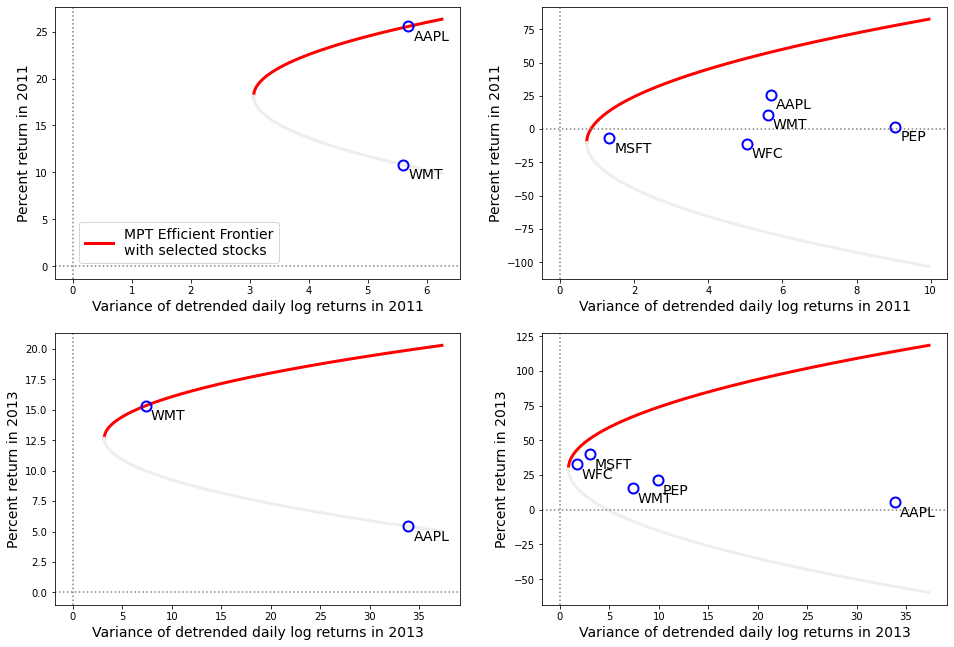

In [7]:
for i_col, stocks in enumerate([['AAPL', 'WMT'], ['AAPL', 'MSFT', 'PEP', 'WFC', 'WMT']]):
    for i_row, year in enumerate([2011, 2013]):
        read_calc_plot_eff_front(selected_year=year, selected_stocks=stocks, subplots=True, 
                                 i_row=i_row, i_col=i_col, n_row=2, n_col=2)

fig = plt.gcf()
fig.set_size_inches([16, 11])
plt.show()

##### Question: Where are random portfolios on the variance - return plane relative to the Efficient Frontier ?

1. Select $\,N\,$ stocks, and calculate their efficient frontier with the above tools.
2. Generate $\,100\,$ random portfolios of the $\,N\,$ stocks. 
3. For $\,N=2\,$, $\,4\,$ or $\,6\,$ stocks where will these random portfolios lie on the variance - return plot relative to the Efficient Frontier ?

###### Answer

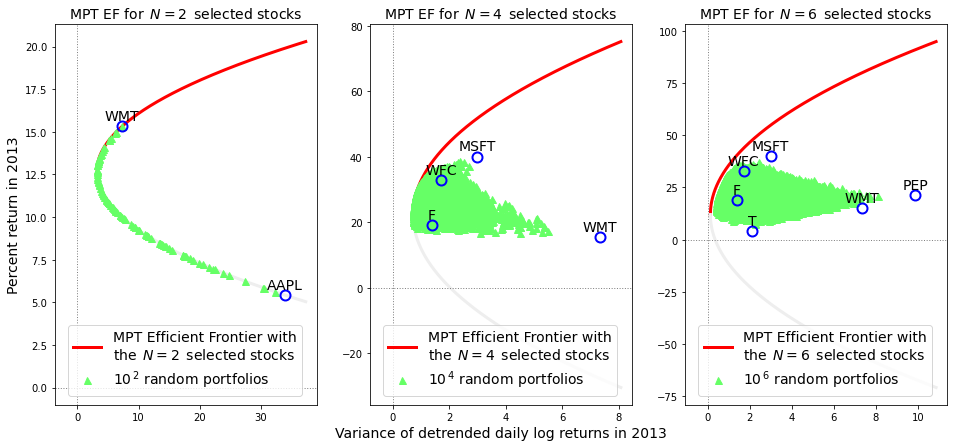

In [52]:
import numpy as np
import matplotlib.pyplot as plt

STOCK_LISTS = [['AAPL', 'WMT'], ['F', 'MSFT', 'WFC', 'WMT'], ['F', 'MSFT', 'PEP', 'T', 'WFC', 'WMT']]
DATA_FILE_NAME = 'prices-split-adjusted.csv'  # data file
SELECTED_YEAR = 2013
N_RND_PER_DIMENSION = 10  # with N selected stocks (N dimensions of the return vector) use 10^N random portfolios
CURVE_STEP_NUM = 1000  # number of steps for plotting the Efficient Frontier numerically
FONTSIZE = 14


def random_uniform_list_unit_sum(size=None):
    w = np.random.uniform(size=size)
    return w / np.sum(w)


def eff_front_with_rnd_portfolios_of_stocks():

    plt.clf()
    prices = read_prices(file_name=DATA_FILE_NAME, selected_year=SELECTED_YEAR)
    for i_col, selected_stocks in enumerate(STOCK_LISTS):
        r, c = map(returns_covariances(prices=prices, selected_stocks=selected_stocks).get, 
                   ['percent_returns', 'covariances'])
        K, q_0, sigma_0_sqr = map(ef_params(returns=r, covariance_matrix=c).get, ['K', 'q_0', 'sigma_0_sqr'])

        # select randomized portfolios, calculate their percent returns and variances
        n_stock = len(r)
        n_portfolios = int(N_RND_PER_DIMENSION ** n_stock)
        weight_vectors_rnd = [random_uniform_list_unit_sum(size=n_stock) for _ in range(n_portfolios)]
        percent_returns_rnd = [np.matmul(r, w.T) for w in weight_vectors_rnd]
        variances_rnd = [np.matmul(w, np.matmul(c, w.T)) for w in weight_vectors_rnd]
        
        # points of the parabolic efficient frontier: 'EF_returns' is the upper part, 'EF_returns_lo' is the lower part
        stock_variances = np.diag(c)
        EF_variances = np.linspace(sigma_0_sqr, 1.1 * np.amax(stock_variances), CURVE_STEP_NUM)
        EF_returns = [q_0 + K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in EF_variances]
        EF_returns_lo = [q_0 - K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in EF_variances]

        # plot curves, labels and the current set of selected stocks
        plt.subplot('1' + str(len(STOCK_LISTS)) + str(i_col + 1))
        plt.plot(EF_variances, EF_returns, 'r-', 
                 label='MPT Efficient Frontier with\nthe $\,N=' + str(n_stock) + '\,$ selected stocks', lw=3)
        plt.plot(EF_variances, EF_returns_lo, color='#eee', linewidth=3)
        plt.axhline(0, c='gray', ls='dotted', linewidth=1)
        plt.axvline(0, c='gray', ls='dotted', linewidth=1)
        plt.xlim(left = -0.1 * np.amax(EF_variances))
        plt.title('MPT EF for $\,N = ' + str(n_stock) + '\,$ selected stocks', fontsize=FONTSIZE)

        plt.plot(variances_rnd, percent_returns_rnd, 
                 label= '$' + str(N_RND_PER_DIMENSION) + '^{\, ' + str(n_stock) + '}$ random portfolios', c='#6f6', 
                 marker='^', linewidth=0, markersize=7)
        plt.legend(bbox_to_anchor=(.05, .21), loc=2, borderaxespad=0.0, fontsize=FONTSIZE)

        if i_col == 0:  # show the y axis label only on the top left subplot
            plt.ylabel('Percent return in ' + str(SELECTED_YEAR), fontsize=FONTSIZE)
        if i_col == 1:
            plt.xlabel('Variance of detrended daily log returns in ' + str(SELECTED_YEAR), fontsize=FONTSIZE)
        for x, y, label in zip(stock_variances, r, selected_stocks):
            plt.annotate(label, (x, y), textcoords='offset points', xytext=(0, 6), ha='center', fontsize=FONTSIZE)
      
        plt.plot(stock_variances, r, c='b', marker='o', linewidth=0, markersize=10, 
                 fillstyle='none', markeredgewidth=2)

    fig = plt.gcf()
    fig.set_size_inches([16, 7])
    plt.show()


eff_front_with_rnd_portfolios_of_stocks()

#### Two mutual fund theorem

Consider `any two different portfolios` $\,$ A $\,$ and $\,$ B $\,$ that are both `on the efficient frontier` of risky assets.<br/>
Their asset weights are 
$\,\mathbf{w}^\mathrm{\,(A)}=\left(\,w_{\,1}^\mathrm{\,(A)},\,\dots\,,\,w_{\,N}^\mathrm{\,(A)}\,\right)\,$ and
$\,\mathbf{w}^\mathrm{\,(B)}\,$ such that 
$\,\mathbf{w}^\mathrm{\,(A)}\,\mathbf{1}^\mathrm{\,T} = 
\mathbf{w}^\mathrm{\,(B)}\,\mathbf{1}^\mathrm{\,T} = 1\,$.

The two mutual fund theorem states that `any third portfolio` $\,$ C $\,$ that is also on the parabolic efficient frontier of risky assets<br/>
`is a linear combination` of the portfolios $\,$ A $\,$ and $\,$ B $\,$.

The initial portfolios $\,$ A $\,$ and $\,$ B $\,$ are called the `two mutual funds` here.

###### Constructive proof

With the real number $\,z\,$ generate the linear combination 
$\,\mathbf{\hat{w}}=z\,\mathbf{w}^\mathrm{\,(A)}+\left(\,1-z\,\right)\,\mathbf{w}^\mathrm{\,(B)}\,$ of the two initial portfolios.

The vectors $\,\mathbf{w}^\mathrm{\,(A)}\,$ and $\,\mathbf{w}^\mathrm{\,(B)}\,$ 
are both solutions to $\,(1)\,$, $\,(2)\,$, and $\,(3)\,$, 
therefore, $\,\mathbf{\hat{w}}\,$ is also a solution.
<br/>
In other words, the newly constructed portfolio with the $\,\mathbf{\hat{w}}\,$ weights is also on the parabolic efficient frontier of risky assets.
<br/>
When $\,z\,$ moves continuously, the new portfolio visits all points along the parabola.

If the selected portfolio $\,$ C $\,$ has asset weights $\,\mathbf{w}^\mathrm{\,(C)}\,$,<br/>
then the $\,z\,$ value to produce this selected portfolio as a
linear combination of $\,$ A $\,$ and $\,$ B $\,$ is

$\,\displaystyle{ z = 
\frac{
\left( \, \mathbf{w}^\mathrm{\,(C)} - \mathbf{w}^\mathrm{\,(B)} \, \right) \, 
\left(\mathbf{w}^\mathrm{\,(C)}\right)^\mathrm{T}
}{
\left( \, \mathbf{w}^\mathrm{\,(A)} - \mathbf{w}^\mathrm{\,(B)} \, \right) \,
\left(\mathbf{w}^\mathrm{\,(C)}\right)^\mathrm{T}
}
}\,$.

###### Comments

1. The two initial portfolios $\,$ A $\,$ and $\,$ B $\,$ need to be different enough so that the denominator is not too small.

2. With $\,z=1\,$ the new portfolio is identical to the initial portfolio $\,$ A $\,$, and with $\,z=0\,$ it is identical to $\,$ B $\,$.

3. With $\,0<z<1\,$ the new portfolio contains a positive amount of both initial portfolios.

4. If $\,z<0\,$, then the entire capital is allocated in $\,$ B $\,$ and there is also a short position<br/>
 of the initial $\,$ A $\,$ and the money received is invested in an additional $\,-z>0\,$ amount of $\,$ B $\,$.

### Efficient Frontier when including a risk-free asset

#### Description of the task
* The `risk-free asset` has zero variance and a fixed $\,q_{\,\mathrm{F}}\,$ yearly return.

* Invest $\,z\,$ part of the available capital in the risky assets and $\,1-z\,$ part in the risk-free asset.



* With this `mixed portfolio` for any selected variance calculate the `highest possible return`.

###### Shorting

* Short-selling (also called: shorting) means that you agree to (a) sell an asset now and (b) buy the same asset later,<br/>
because you think its future price will be lower than the price expected by other participants of the market.

* The risk-free asset is never shorted, because for any future time point everyone expects the exact same price.<br/>
In other words, $\,z\,$ `cannot be negative`.

* The $\,z>1\,$ range means 
  - allocating the entire capital in the risk-free asset
  - and shorting $\,z-1\,$ amount of the risky assets in exchange for $\,z-1\,$ amount of the risk-free asset.


###### Sum of weights, returns, variance

* The weights, returns and the covariance matrix of the risky assets are $\,z\,\mathbf{w}\,$, $\,\mathbf{r}\,$ and $\,\mathbf{c}\,$.
* The `sum of the weights of the risky assets` is  $\,z\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T} = z\,$.


* The return of the portfolio's risk-free part is $\,\left(\,1-z\,\right)\, q_{\,\mathrm{F}}\,$, 
and the return of the risky part is $\,z \, \mathbf{w}\,\mathbf{r}^\mathrm{\,T}$.
* The `return` of the entire portfolio is 
$\,q = \left(\,1-z\,\right) \, q_{\,\mathrm{F}} +  z \, \mathbf{w}\,\mathbf{r}^\mathrm{\,T}$.



* The variance of the portfolio's risky part is
$\,\left(\,z\,\mathbf{w}\,\right) \, \mathbf{c}\,\, \left(\,z\,\mathbf{w}\,\right)^\mathrm{\,T}=z^{\,2}\,\sigma^{\,2}\,$. 
* The portfolio's risk-free part has zero variance. Also, it has zero covariance with the portfolio's risky part.
* Therefore, the `variance` of the entire portfolio is $\,\hat{\sigma}^{\,2}=\,z^{\,2}\,\sigma^{\,2}\,$.

#### Derivation with the Lagrange method

This derivation is similar to the Lagrange method applied above to the risky assets only.<br/>
Note: if investors do buy risky assets, then the highest return is above $\,q_{\,\mathrm{F}} \,$.

Set $\, q_{\,\mathrm{F}} \,$ to a fixed value, and set a fixed $\, q \ge q_{\,\mathrm{F}} \,$.
<br/>
There are $\,N+1\,$ variables, and they are all non-negative: $\,z\,$ and $\,\mathbf{w}=\left(\,w_{\,1},\,\dots,\,w_{\,N}\,\right)\,$.



Minimize $\,\hat{\sigma}^{\,2}\,$
 with the conditions
$\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T} = 1\,$
and
$\,q = \left(\,1-z\,\right) \, q_{\,\mathrm{F}} +  z \, \mathbf{w}\,\mathbf{r}^\mathrm{\,T}$.

##### Equations

In addition to the $\,N+1\,$ variables ($\,z\,$ and $\,\mathbf{w}\,$),
apply also the variables
$\,\lambda_{\,\mathrm{1}}\,$ and $\,\lambda_{\,\mathrm{q}}\,$ to `minimize the Lagrange function` 
<br/>
$\,\mathcal{L}\,\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}},\,\color{red}{z}\,\right)
= \color{red}{z^{\,2}} \, \mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} 
- \lambda_{\,\mathrm{1}}\,\Big( \color{red}{z}\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T} - \color{red}{z} \Big)
- \lambda_{\,\mathrm{q}}\,\Big(
\color{red}{\left(\,1-z\,\right) \, q_{\,\mathrm{F}} +  z} \, \mathbf{w}\,\mathbf{r}^\mathrm{\,T} - q
\Big)\,$.

`New items` compared to the previous Lagrange function `are colored red`.


Similarly to $\,(1)\,$, $\,(2)\,$ and $\,(3)\,$, 
the necessary conditions for the local minimum are the following:

$(20)$ $\,\,\,$ 
$
\mathbf{0} = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\mathbf{w}}} = 
\color{red}{z^{\,2}} \, \mathbf{c}\,\mathbf{w}^\mathrm{\,T} - 
\color{red}{z} \, \lambda_{\,\mathrm{1}}\,\mathbf{1}^\mathrm{\,T} - 
\color{red}{z} \, \lambda_{\,\mathrm{q}} \, \mathbf{r}^\mathrm{\,T} 
$

$(21)$ $\,\,\,$ 
$
0 = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\lambda_{\,\mathrm{1}}}} = 
\color{red}{z} \left(\,1 - \mathbf{w}\,\mathbf{1}^\mathrm{\,T}\,\right)
$

$(22)$ $\,\,\,$ 
$
0 = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\lambda_{\,\mathrm{q}}}} = 
q \color{red}{ -  \left(\,1-z\,\right) \, q_{\,\mathrm{F}} } 
- \color{red}{z} \, \mathbf{w}\,\mathbf{r}^\mathrm{\,T} 
$

$(23)$ $\,\,\,$ 
$
\color{red}
{
0 = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,z}} = 
2\,z \, \sigma^{\,2} -
\lambda_{\,\mathrm{1}} \left(\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T} - 1\,\right) -
\lambda_{\,\mathrm{q}}\, \left(\, \mathbf{w}\,\mathbf{r}^\mathrm{\,T} - q_{\,\mathrm{F}}\,\right)
}
$


The $\,N+3\,$ equations in $\,(20)\,$, $\,(21)\,$, $\,(22)\,$ and $\,(23)\,$ contain $\,N+3\,$ unknowns:
$\,\lambda_{\,\mathrm{1}}\,$, $\,\lambda_{\,\mathrm{q}}\,$, $\,z\,$ and the $\,\mathbf{w}\,$ weights.

##### Solving the equations for return vs variance

###### The solution is a line tangent to the previously calculated parabola

Note from $\,(21)\,$ that $\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T} - 1 = 0\,$, 
and note from $\,(22)\,$ that 
$\, z \left(\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T} - q_{\,\mathrm{F}}\,\right) = q-q_{\,\mathrm{F}}\,$.
<br/>
Multipying $\,(23)\,$ by $\,z\,$ and inserting these two equations with the `new variable` 
$\,b=2\,\mathit{/}\,\lambda_{\,\mathrm{q}}\,$
into $\,(23)\,$ gives

$(24)$ $\,\,\,$ 
$\,q\left(\,\hat{\sigma}^{\,2}\,\right) = q_{\,\mathrm{F}} + b\,\, \hat{\sigma}^{\,2}\,$.

<br/>

In $\,(24)\,$  the risk-free rate $\,q_{\,\mathrm{F}}\,$ is a constant and $\,b\,$ is a parameter independent from $\,z\,$.<br/>
Therefore, $\,q\left(\,\hat{\sigma}^{\,2}\,\right)\,$ is a `linear function` of its variable. 
The slope of this line can be calculated from the following:

* In the $\,z=0\,$ case $\,(22)\,$ gives $\,q=q_{\,\mathrm{F}}\,$, 
therefore, the $\,z=0\,$ point of the line is 
$\,\left(\,0\,,\,q_{\,\mathrm{F}}\,\right)\,$.


* In the $\,z=1\,$ case the equations $\,(20)\,$ to $\,(22)\,$ are identical to the equations $\,(1)\,$ to $\,(3)\,$,<br/>
therefore, the $\,z=1\,$ point of the line lies on the parabola shown in $\,(19)\,$.<br/>


* We know that risky assets are purchased. Thus, for any non-zero risk the return exceeds the risk-free rate.


* By its definition, the $\,q\left(\,\hat{\sigma}^{\,2}\,\right)\,$ solution is always the highest possible value.<br/>
Therefore, the line shown in $\,(24)\,$ cannot intersect the parabola, it can only touch the parabola.


In summary, the portfolio's $\,q\left(\,\hat{\sigma}^{\,2}\,\right)\,$ `return` as a function of the portfolio's variance $\,\hat{\sigma}^{\,2}\,$ is<br/>
a line with a positive slope that goes through the $\,\left(\,0\,,\,q_{\,\mathrm{F}}\,\right)\,$ point,
and it is `tangent to the parabola`

$(25)$ $\,\,\,$ 
$\,\displaystyle{
q\left(\,\hat{\sigma}^{\,2}\,\right) = 
q_{\,0} + K\,\sqrt{ \hat{\sigma}^{\,2} - \sigma^\mathrm{\,2}_{\,0}\,}
}\,$ $\,\,\,$
with the $\,q_{\,0}\,$, $\,K\,$, and $\,\sigma^\mathrm{\,2}_{\,0}\,$ parameters calculated at $\,(19)\,$.

###### Visual explanation of why the tangent to the parabola is the efficient frontier

Drawing is usually easier with PowerPoint. Let's do it this time with matplotlib.

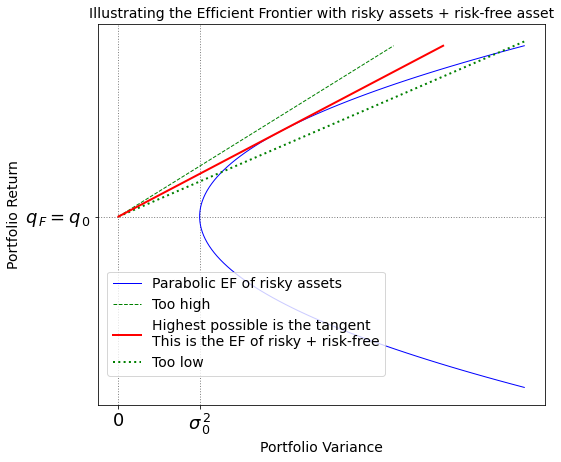

In [188]:
import numpy as np

FONTSIZE = 14
TICKS_FONTSIZE = 18


def plot_parabola_tangent_and_other_lines():
    # temporary values used only inside this function
    _q_F, _q_0, _K, _sigma_0_sqr = 1, 1, 1, 1
    _q_min, _q_max = -1, 3
    _n_points_parabola = 100

    # points of the parabola
    parabola_points_return = np.linspace(_q_min, _q_max, _n_points_parabola)
    parabola_points_variance = [((q - _q_0)  / _K) ** 2.0 + np.sqrt(_sigma_0_sqr) for q in parabola_points_return]
    
    # tangency point, uses equations (27) and (29)
    x = (_q_F - _q_0) / _K
    s = x + np.sqrt(x + _sigma_0_sqr)
    b = 0.5 * _K / s
    tangency_point_variance = s ** 2.0 + _sigma_0_sqr
    tangency_point_return = _q_F + b * tangency_point_variance

    # tangent line
    tangent_line_slope = b
    tangent_line_return_max = _q_max
    tangent_line_variance_max = (tangent_line_return_max - _q_F) / tangent_line_slope
    tangent_line = [[0, tangent_line_variance_max], [_q_F, tangent_line_return_max]]

    # higher line
    higher_line_slope = 1.18 * tangent_line_slope
    higher_line_return_max = tangent_line_return_max
    higher_line_variance_max = (higher_line_return_max - _q_F) / higher_line_slope
    higher_line = [[0, higher_line_variance_max], [_q_F, higher_line_return_max]]
    
    # lower line
    lower_line_slope = 0.82 * tangent_line_slope
    lower_line_variance_max = np.amax(parabola_points_variance)
    lower_line_return_max = _q_F + lower_line_slope * lower_line_variance_max
    lower_line = [[0, lower_line_variance_max], [_q_F, lower_line_return_max]]
    
    # plot all
    plt.plot(parabola_points_variance, parabola_points_return, label='Parabolic EF of risky assets', 
             color='b', lw=1, zorder=3)
    plt.plot(*higher_line, 'g--', lw=1, zorder=4, label='Too high')
    plt.plot(*tangent_line, c='r', lw=2, zorder=5, label='Highest possible is the tangent\nThis is the EF of risky + risk-free')
    plt.plot(*lower_line, 'g:', lw=2, zorder=4, label='Too low')
    plt.legend(bbox_to_anchor=(.02, .35), loc=2, borderaxespad=0.0, fontsize=FONTSIZE)
    plt.title('Illustrating the Efficient Frontier with risky assets + risk-free asset', fontsize=FONTSIZE)
    plt.xlabel('Portfolio Variance', fontsize=FONTSIZE)
    plt.ylabel('Portfolio Return', fontsize=FONTSIZE)
    plt.axvline(0, c='gray', ls='dotted', lw=1)
    plt.axvline(1, c='gray', ls='dotted', lw=1)
    plt.axhline(1, c='gray', ls='dotted', lw=1)
    plt.rc('xtick', labelsize=TICKS_FONTSIZE)
    plt.xticks([0, 1], [0, '$\sigma_{\,0}^{\,2}$'])
    plt.rc('ytick', labelsize=TICKS_FONTSIZE)
    plt.yticks([1], ['$q_{\,F}=q_{\,0}$'])

    fig = plt.gcf()
    fig.set_size_inches([8, 7])
    plt.show()    
    
    
plot_parabola_tangent_and_other_lines()

###### Calculating the slope of the return vs variance line from the condition of being tangent

At the $\,z=1\,$ parameter value the line and the parabola are tangent, and the entire capital is in the risky assets.<br/>
This point is called the `tangency point` and the portfolio with this $\,\left(\,\hat{\sigma}^{\,2},\,q\,\right)\,$ value pair is called the `tangency portfolio`.


For the tangency portfolio the right hand sides of $\,(24)\,$ and $\,(25)\,$ are equal (see $\,(26)\,$ below),<br/>
and also the derivatives of these right hand sides with respect to  $\,\hat{\sigma}^{\,2}\,$ are equal (see $\,(27)\,$ below).

With the `new variable` $\,s=\sqrt{ \hat{\sigma}^{\,2}-\sigma^{\,2}_{\,0}\,}\,$ the resulting equations are:

$(26)$ $\,\,\,$ 
$\,q_{\,\mathrm{F}} + b\,\left(\,s^{\,2}+\sigma^{\,2}_{\,0}\,\right) =
q_{\,0}  +  K\,s \,$,

$(27)$ $\,\,\,$ 
$\,\displaystyle{b = \frac{K}{2\,s} } \,$,

<br/>

Next, from $\,(27)\,$ insert $\,b\,$ into $\,(26)\,$, and then multiply with $\,2\,s\,$ 
to obtain the quadratic equation

$(28)$ $\,\,\,$ 
$0 = K\, s^{\,2} + \left(\,2\,q_{\,0} - 2\,q_{\,\mathrm{F}}\,\right) s + \left(\,-K\,\sigma^{\,2}_{\,0}\,\right) \,$.


The quadratic equation $\,(28)\,$ has one positive and one negative root for $\,s\,$.<br/>
By its definition, $\,s\,$ cannot be negative, so we need the positive root:

$(29)$ $\,\,\,$ 
$\displaystyle{ s = \frac{q_{\,\mathrm{F}}-q_{\,0}}{K} + \sqrt{\left(\frac{q_{\,\mathrm{F}}-q_{\,0}}{K}\right)^2 + \sigma^{\,2}_{\,0}\,}}\,$.

<br/>

From $\,(29)\,$ insert $\,s\,$ into the $\,b\,$ in $\,(27)\,$, and insert the resulting $\,b\,$ 
into $\,(24)\,$ to obtain the $\,q\left(\,\hat{\sigma}^{\,2}\,\right)\,$ `efficient frontier`.
<br/>
Moreover, with the $\,s\,$ value shown in $\,(29)\,$ the variance at the `tangency point` is $\,s^{\,2}+\sigma^{\,2}_{\,0}\,$.


##### Question: EF, Tangency point, Random portfolios

With risky and risk-free assets where are randomly selected portfolios on the return - variance plane compared to the Efficient Frontier, and where is the Tangency point ?

1. Select $\,N\,$ stocks, and calculate their efficient frontier with the above tools.
2. Select a risk-free rate. Preferably, the annualized USD yield for a tenor of 1 year or 2 years.
3. Generate $\,100\,$ random portfolios of the $\,N\,$ stocks and the risk-free asset.
4. For $\,N=2\,$, $\,4\,$ and $\,6\,$ stocks see where these random portfolios lie on the variance - return plot relative to the Efficient Frontier.

###### Answer

<span style='font-weight:bold;background-color:yellow;color:red'>^^^ fix bug: rnd portfolios shouldn't be above the EF line</span>

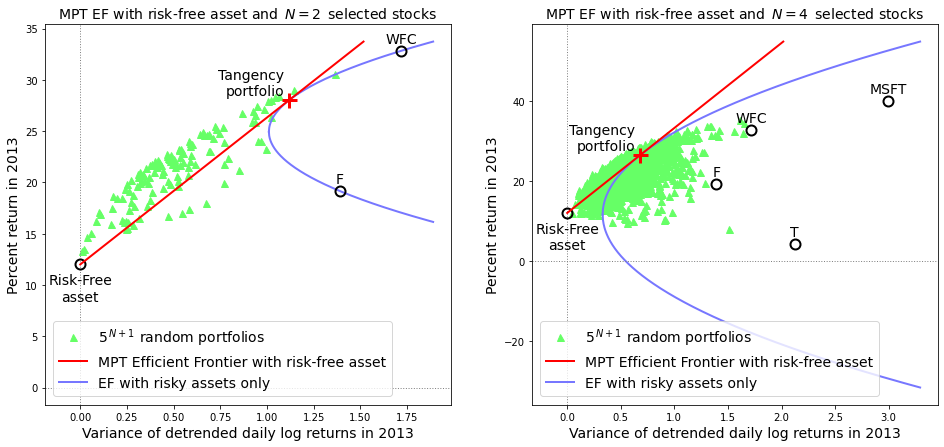

In [116]:
import numpy as np
import matplotlib.pyplot as plt

RISK_FREE_RATE_PERCENT = 12.0  # percent value of the risk free rate
STOCK_LISTS = [['F', 'WFC'], ['F', 'MSFT', 'T', 'WFC']]
DATA_FILE_NAME = 'prices-split-adjusted.csv'  # data file
SELECTED_YEAR = 2013
N_STEP_PARABOLA = 1000  # number of steps for plotting the parabolic curve numerically
FONTSIZE = 14
DRAW_PADDING = 1.1  # multiplier for adding padding to the curves
PLOT_RND_PORTFOLIOS = True
N_RND_PER_DIMENSION = 5  # with N selected stocks (N dimensions of the return vector) use 10^N random portfolios


def eff_front_with_rnd_and_risk_free():

    plt.clf()
    prices = read_prices(file_name=FILE_NAME, selected_year=SELECTED_YEAR)
    for i_col, selected_stocks in enumerate(STOCK_LISTS):
        plt.subplot('1' + str(len(STOCK_LISTS)) + str(i_col + 1))
        n_stock = len(selected_stocks)

        # returns and covariances of the risky assets
        r, c = map(returns_covariances(prices=prices, selected_stocks=selected_stocks).get, 
                   ['percent_returns', 'covariances'])

        # parameters of the parabolic efficient frontier of the risky assets
        K, q_0, sigma_0_sqr = map(ef_params(returns=r, covariance_matrix=c).get, ['K', 'q_0', 'sigma_0_sqr'])

        # b: slope of the linear efficient frontier of the risk-free asset plus risky assets
        q_F = RISK_FREE_RATE_PERCENT
        x = (q_F - q_0) / K
        s = x + np.sqrt(x ** 2.0 + sigma_0_sqr)
        b = 0.5 * K / s
        tangency_point_variance = s ** 2.0 + sigma_0_sqr
        tangency_point_percent_return = q_F + b * tangency_point_variance
        tangecy_point = (tangency_point_variance, tangency_point_percent_return)

        if PLOT_RND_PORTFOLIOS:
            # select randomized portfolio weights
            n_portfolios = int(N_RND_PER_DIMENSION ** (n_stock + 1))
            weight_vectors_rnd = [random_uniform_list_unit_sum(size = n_stock + 1) for _ in range(n_portfolios)]

            # include the risk-free asset into the percent return vector: put r_F at the first position
            r_all = np.hstack((np.array([q_F]), r))
            # include the risk-free asset into the covariance matrix: append a zero first row and a zero first column
            c_all = np.hstack((np.zeros(n_stock + 1).T[:,None], np.vstack((np.zeros(n_stock), c))))

            # percent return and variance of each portfolio with the selected random weights
            percent_returns_of_rnd_portfolios = [np.matmul(r_all, w_all.T) for w_all in weight_vectors_rnd]
            variances_of_rnd_portfolios = [np.matmul(w_all, np.matmul(c_all, w_all.T)) for w_all in weight_vectors_rnd]

            # rnd portfolios
            plt.plot(variances_of_rnd_portfolios, percent_returns_of_rnd_portfolios, 
                     label= '$' + str(N_RND_PER_DIMENSION) + r'^{\,N + 1}$ random portfolios', 
                     c='#6f6', marker='^', linewidth=0, markersize=7, zorder=1)

        # points of the parabola: the upper part is 'parabola_returns', the lower part is 'parabola_returns_lo'
        stock_variances = np.diag(c)
        curves_variance_max = DRAW_PADDING * np.amax(stock_variances)
        parabola_variances = np.linspace(sigma_0_sqr, curves_variance_max, N_STEP_PARABOLA)
        parabola_returns = [q_0 + K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in parabola_variances]
        parabola_returns_lo = [q_0 - K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in parabola_variances]

        # the right end point of the linear efficient frontier should be not too high
        curves_r_max = np.amax(parabola_returns)
        line_end_point_variance = curves_variance_max
        line_end_point_percent_return = q_F + b * line_end_point_variance
        if line_end_point_percent_return > curves_r_max:
            line_end_point_percent_return = curves_r_max
            line_end_point_variance = (line_end_point_percent_return - q_F) / b        
        line_points_variance = [0, line_end_point_variance]
        line_points_return = [q_F, line_end_point_percent_return]
            
        # curves, titles and  the current set of selected stocks
        plt.plot(line_points_variance, line_points_return, label='MPT Efficient Frontier with risk-free asset',
                 color='red', lw=2, zorder=3)
        plt.plot(parabola_variances, parabola_returns, color='#77f', linewidth=2, zorder=2)
        plt.plot(parabola_variances, parabola_returns_lo, color='#77f', linewidth=2, zorder=2,
                label='EF with risky assets only')
        plt.axhline(0, c='gray', ls='dotted', linewidth=1)
        plt.axvline(0, c='gray', ls='dotted', linewidth=1)
        plt.xlim(left = -0.1 * np.amax(parabola_variances))
        plt.title('MPT EF with risk-free asset and $\,N = ' + str(n_stock) + '\,$ selected stocks', fontsize=FONTSIZE)
        plt.legend(bbox_to_anchor=(.02, .22), loc=2, borderaxespad=0.0, fontsize=FONTSIZE)

        # plot labels, axis labels and selected stocks with labels
        plt.ylabel('Percent return in ' + str(SELECTED_YEAR), fontsize=FONTSIZE)
        plt.xlabel('Variance of detrended daily log returns in ' + str(SELECTED_YEAR), fontsize=FONTSIZE)      
        plt.plot(stock_variances, r, c='k', marker='o', linewidth=0, markersize=10, fillstyle='none', markeredgewidth=2)
        for x, y, label in zip(stock_variances, r, selected_stocks):
            plt.annotate(label, (x, y), textcoords='offset points', xytext=(0, 8), ha='center', fontsize=FONTSIZE)
        plt.plot([0], [q_F], c='k', marker='o', linewidth=0, markersize=10, fillstyle='none', markeredgewidth=2)
        plt.annotate('Risk-Free\nasset', (0, q_F), textcoords='offset points', 
                     xytext=(0, -9), ha='center', va='top', fontsize=FONTSIZE)
        plt.plot([tangency_point_variance], [tangency_point_percent_return], c='r', marker='+', mew=3, ms=15)
        plt.annotate('Tangency\nportfolio', tangecy_point, textcoords='offset points', 
                     xytext=(-5, 2), ha='right', va='bottom', fontsize=FONTSIZE)

    fig = plt.gcf()
    fig.set_size_inches([16, 7])
    plt.show()


eff_front_with_rnd_and_risk_free()

##### One mutual fund theorem

Consider `any portfolio` $\,$ P $\,$ on the efficient frontier line defined by the risk-free asset and the risky assets.
<br/>
The one mutual fund theorem states that this portfolio `is a linear combination` of the risk-free asset and the tangency portfolio.
<br/>
The tangency portfolio $\,$ T $\,$ is called the `one mutual fund` here.

###### Constructive proof

In the tangency portfolio the weight of the risk-free asset is $\,0\,$, and the weights of the risky assets are $\,\mathbf{w}\,$.
<br/>
With the $\,z\ge 0\,$ number generate the portfolio containing the risky assets with weights
$\,z\,\mathbf{w}\,$, and the risk-free asset with weight $\,1-z\,$.
<br/>
When $\,z\,$ moves continuously, this new portfolio visits all points along the efficient frontier line.

To obtain the $\,z\,$ value reproducing the portfolio $\,$ P $\,$ do the following:
1. If the selected $\,$ P $\,$ portfolio contains the risk-free asset with weight $\,1\,$, then $\,z=0\,$.
2. Otherwise $\,z\,$ is the sum of the weights of the risky assets in portfolio $\,$ P $\,$.

##### Switching the Efficient Frontier line from variance to volatility

If portfolio's are allowed to combine risky assets with the risk-free asset, then based on $\,(24)\,$,<br/> 
the efficient frontier is a line,
and along this line the return of a portfolio is a linear function of portfolio `variance`.

Recall that 
$\,z\ge 0\,$ is the total weight of risky assets in the entire portfolio<br/>
and if $\,z=0\,$, then $\,\sigma=\hat{\sigma}\,\mathit{/}\,z\,$ is the yearly volatility of the risky part of the portfolio.

In $\,(24)\,$ take the square root of the portfolio variance $\,\hat{\sigma}^{\,2}\,$ 
to show that `along the efficient frontier`<br/>
 the return is the `same linear function of portfolio volatility` $\,\hat{\sigma}\,$ :

$(30)$ $\,\,\,$ 
$\,q\left(\,\hat{\sigma}\,\right) = q_{\,\mathrm{F}} + b\,\, \hat{\sigma}\,$.

In the $\,z>0\,$ case $\,(24)\,$ is also true for the $\,\sigma\,$ volatility of the portfolio's risky part.

`From this point return is compared to volatility, not variance.`

##### Capital Allocation Line (CAL) and Capital Market Line (CML)

###### A fixed risky portfolio combined with the risk-free asset
Consider a fixed portfolio $\,$ F $\,$ that contains the risky assets with weights $\,\mathbf{w}^\mathrm{\,(F)}\,$ and the risk-free asset with weight $\,0\,$.
<br/>
The sum of the risky asset weights is $\,\mathbf{w}^\mathrm{\,(F)}\,\mathbf{1}^\mathrm{\,T}=1\,$.

With a $\,z\ge 0\,$ number construct another portfolio that contains $\,$ F $\,$ with weight $\,z\,$ and the risk-free asset with weight $\,1-z\,$.
<br/>
The return and the volatility of this combined portfolio are both linear functions of $\,z\,$, thus, its return is a linear function of its volatility.
<br/>
In summary, the portfolios combining the risk-free asset with a fixed risky portfolio are a `line on the return vs volatility plot`.

The `Capital Allocation Line` (CAL) is the set of return (vertical axis) vs volatility (horizontal axis)
points of all portfolios<br/>
that combine a `fixed risky portfolio` with the `risk-free asset`.

###### Tangency portfolio combined with the risk-free asset

The `Capital Market Line` (CML) is the CAL with the highest possible $\,\alpha\,$ slope calculated in $\,(30)\,$.<br/>
In other words, for the CML the fixed risky portfolio is the tangency portfolio.

###### The EMH implies that the Market portfolio is the Tangency portfolio

The `market portfolio of risky assets` is the portfolio that contains each risky asset with a weight proportional to its market capitalization.

If the Efficient Market Hypothesis (EMH) is true, then the market portfolio of risky assets is on the CML.
<br/>
In other words, the EMH implies that the market portfolio is a linear combination of the risk-free asset and the tangency portfolio.
<br/>
Since the market portfolio has no risk-free component, this means that the market portfolio is the tangency portfolio.

#### Performance measurement

##### Sharpe ratio

<span style='font-weight:bold;background-color:yellow;color:red'>^^^ </span>

###### The `ex-ante` Sharpe ratio
<span style='font-weight:bold;background-color:yellow;color:red'>^^^ </span>


###### Sortino ratio
<span style='font-weight:bold;background-color:yellow;color:red'>^^^ </span>

##### Information ratio

<span style='font-weight:bold;background-color:yellow;color:red'>^^^ </span>

## Capital Asset Pricing Model (CAPM, 1961-66)

* definitions
* compare to MPT

* compare to data

* Treynor

* Jensen

### Security Market Line

## Suggested Reading
* Efficient Market Hypothesis on Investopedia - General intro - https://www.investopedia.com/terms/e/efficientmarkethypothesis.asp
* Modern Portfolio Theory on Wikipedia - Page under construction - https://en.wikipedia.org/wiki/Modern_portfolio_theory
* OCW course - https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/